In [1]:
# set up imports
import os
import sys
__file__ = os.getcwd()
proj_dir =  os.path.dirname(os.path.realpath(__file__))
sys.path.append(proj_dir)
utils_dir = os.path.join(proj_dir,'utils')
sys.path.append(utils_dir)
analysis_dir = os.path.join(proj_dir,'analysis')
analysis_utils_dir = os.path.join(analysis_dir,'utils')
sys.path.append(analysis_utils_dir)
agent_dir = os.path.join(proj_dir,'model')
sys.path.append(agent_dir)
agent_util_dir = os.path.join(agent_dir,'utils')
sys.path.append(agent_util_dir)
experiments_dir = os.path.join(proj_dir,'experiments')
sys.path.append(experiments_dir)
df_dir = os.path.join(proj_dir,'results/dataframes')

In [2]:
from model.Subgoal_Planning_Agent import *
import utils.blockworld as bw
import utils.blockworld_library as bl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import model.utils.decomposition_functions
from analysis.sequence_selection import *

In [4]:
#inline plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams.update({'font.size': 22})

In [6]:
#display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 20)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.min_rows', 6)

Let's load the results of the experiment

In [10]:
df_paths = ['for human experiments/Astar complete sequences 5e for best worst lookahead.pkl']

In [11]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle(os.path.join(df_dir,l)) for l in df_paths])
print("Loaded dataframe")

Loaded dataframe


In [12]:
df

,run_ID,agent,agent_attributes,world,_world,_all_sequences,n_all_sequences,_solved_sequences,n_solved_sequences,_chosen_subgoal_sequence,all_sequences_planning_cost,_agent,agent_type,sequence_length,decomposition_function,include_subsequences,c_weight,max_cost,step_size,random_seed,lower level: agent_type,lower level: heuristic,lower level: max_steps,lower level: dense_stability,lower level: random_seed,execution_time
0,"int_struct_14 | {'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_fu...",Subgoal_Planning_Agent,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",int_struct_14,Blockworld,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f83026f40>, <model.utils.d...",99,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f83026f40>, <model.utils.d...",99,<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f83f06bb0>,1483592,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",Subgoal_Planning_Agent,4,Horizontal_Construction_Paper,False,10,10,0,8720,Astar_Lookahead_Agent,recall,100000,False,28247,4743.542913
1,"int_struct_5 | {'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_fun...",Subgoal_Planning_Agent,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",int_struct_5,Blockworld,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f847987f0>, <model.utils.d...",99,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f847987f0>, <model.utils.d...",93,<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f84dce640>,2960900,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",Subgoal_Planning_Agent,4,Horizontal_Construction_Paper,False,10,10,0,10527,Astar_Lookahead_Agent,recall,100000,False,28247,20219.551985
2,"int_struct_13 | {'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_fu...",Subgoal_Planning_Agent,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",int_struct_13,Blockworld,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f85ca9640>, <model.utils.d...",99,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f85ca9640>, <model.utils.d...",16,<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f85ef4d30>,2809609,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",Subgoal_Planning_Agent,4,Horizontal_Construction_Paper,False,10,10,0,37542,Astar_Lookahead_Agent,recall,100000,False,28247,30714.335985
3,"int_struct_15 | {'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_fu...",Subgoal_Planning_Agent,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",int_struct_15,Blockworld,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f867f1700>, <model.utils.d...",99,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f867f1700>, <model.utils.d...",56,<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f87d98550>,3957175,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",Subgoal_Planning_Agent,4,Horizontal_Construction_Paper,False,10,10,0,46520,Astar_Lookahead_Agent,recall,100000,False,28247,32863.109720
4,"int_struct_16 | {'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_fu...",Subgoal_Planning_Agent,"{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 4, 'decomposition_function': 'Horizo...",int_struct_16,Blockworld,"[<model.utils.decomposition_functions.Subgoal_sequence object at 0x7f7f880ef460>, <model.utils.d...",99,"[<model.utils.decomposition_functions.Subgoal_sequence object

In [13]:
# EITHER compute sequences with best overall sequence
best_sequences_df = pd.DataFrame()

for agent in df['lower level: agent_type'].unique():
    for world in df['world'].unique():
        list_of_list_of_sequences = df[(df['world'] == world) & (df['lower level: agent_type'] == agent)]['_all_sequences'].to_list()
        try:
            best_name, worst_name, delta, best_score, worst_score = get_best_and_worst_sequence(list_of_list_of_sequences)
        except TypeError:
            best_name = worst_name = delta = None
        best_sequences_df = best_sequences_df.append({'agent': agent, 'world': world, 'best_name': best_name, 
                             'worst_name': worst_name, 'delta': delta, 'best score': best_score, 'worst_score': worst_score},
                           ignore_index = True)



In [14]:
best_sequences_df

,agent,best score,best_name,delta,world,worst_name,worst_score
0,Astar_Lookahead_Agent,82.0,"(2, 6, 7, 8)",1874.0,int_struct_14,"(1, 5, 6, 8)",1956.0
1,Astar_Lookahead_Agent,82.0,"(2, 4, 8)",91.0,int_struct_5,"(2, 6, 8)",173.0
2,Astar_Lookahead_Agent,44.0,"(4, 6, 8)",199.0,int_struct_13,"(2, 4, 8)",243.0
3,Astar_Lookahead_Agent,55.0,"(2, 4, 8)",62.0,int_struct_15,"(4, 6, 8)",117.0
4,Astar_Lookahead_Agent,201577.0,"(4, 5, 6, 8)",0.0,int_struct_16,"(4, 6, 7, 8)",201577.0
5,Astar_Lookahead_Agent,125.0,"(2, 4, 8)",124.0,int_struct_2,"(4, 6, 8)",249.0
6,Astar_Lookahead_Agent,1627.0,"(4, 6, 8)",12476.0,int_struct_12,"(2, 4, 8)",14103.0
7,Astar_Lookahead_Agent,126.0,"(3, 5, 7, 8)",26146.0,int_struct_6,"(2, 3, 6, 8)",26272.0
8,Astar_Lookahead_Agent,183.0,"(1, 2, 6, 8)",166216.0,int_struct_4,"(1, 5, 7, 8)",166399.0
9,Astar_Lookahead_Agent,184.0,"(4, 6, 8)",7805.0,int_struct_8,"(2, 4, 8)",7989.0


In [15]:
# OR compute sequences with most divergent pair
divergence_sequences_df = pd.DataFrame()

for agent in df['lower level: agent_type'].unique():
    for world in df['world'].unique():
        list_of_list_of_sequences = df[(df['world'] == world) & (df['lower level: agent_type'] == agent)]['_all_sequences'].to_list()
        try:
            best_name, worst_name, delta, best_score, worst_score = get_most_divergent_pair_sequence(list_of_list_of_sequences)
        except TypeError:
            best_name = worst_name = delta = best_score = worst_score = None
        divergence_sequences_df = divergence_sequences_df.append({'agent': agent, 'world': world, 'best_name': best_name, 
                             'worst_name': worst_name, 'delta': delta, 'best score': best_score, 'worst_score': worst_score},
                           ignore_index = True)


In [16]:
divergence_sequences_df

,agent,best score,best_name,delta,world,worst_name,worst_score
0,Astar_Lookahead_Agent,154.0,"(2, 3, 8)",366821.0,int_struct_14,"(1, 6, 8)",366975.0
1,Astar_Lookahead_Agent,476.0,"(2, 3, 8)",80821.0,int_struct_5,"(2, 7, 8)",81297.0
2,Astar_Lookahead_Agent,519.0,"(2, 3, 6, 8)",14528.0,int_struct_13,"(3, 4, 6, 8)",15047.0
3,Astar_Lookahead_Agent,31702.0,"(7, 8)",148459.0,int_struct_15,"(1, 8)",180161.0
4,Astar_Lookahead_Agent,205831.0,"(4, 7, 8)",2377.0,int_struct_16,"(4, 5, 8)",208208.0
5,Astar_Lookahead_Agent,60460.0,"(3, 8)",71993.0,int_struct_2,"(5, 8)",132453.0
6,Astar_Lookahead_Agent,1627.0,"(4, 6, 8)",12476.0,int_struct_12,"(2, 4, 8)",14103.0
7,Astar_Lookahead_Agent,949.0,"(5, 7, 8)",392246.0,int_struct_6,"(1, 6, 8)",393195.0
8,Astar_Lookahead_Agent,8002.0,"(1, 6, 8)",195693.0,int_struct_4,"(1, 3, 8)",203695.0
9,Astar_Lookahead_Agent,1697.0,"(6, 8)",53523.0,int_struct_8,"(2, 8)",55220.0


Save to file

In [17]:
OUT_DIR = "/Users/felixbinder/Desktop"

In [18]:
best_sequences_df.to_json(OUT_DIR+"/best_worst_subgoal_seqs.json")

Merge the two dfs

In [19]:
best_sequences_df['kind'] = "best"
divergence_sequences_df['kind'] = "divergence"
sequences_df = best_sequences_df.append(divergence_sequences_df)
sequences_df.dropna(inplace=True)

In [20]:
sequences_df

,agent,best score,best_name,delta,world,worst_name,worst_score,kind
0,Astar_Lookahead_Agent,82.0,"(2, 6, 7, 8)",1874.0,int_struct_14,"(1, 5, 6, 8)",1956.0,best
1,Astar_Lookahead_Agent,82.0,"(2, 4, 8)",91.0,int_struct_5,"(2, 6, 8)",173.0,best
2,Astar_Lookahead_Agent,44.0,"(4, 6, 8)",199.0,int_struct_13,"(2, 4, 8)",243.0,best
3,Astar_Lookahead_Agent,55.0,"(2, 4, 8)",62.0,int_struct_15,"(4, 6, 8)",117.0,best
4,Astar_Lookahead_Agent,201577.0,"(4, 5, 6, 8)",0.0,int_struct_16,"(4, 6, 7, 8)",201577.0,best
5,Astar_Lookahead_Agent,125.0,"(2, 4, 8)",124.0,int_struct_2,"(4, 6, 8)",249.0,best
6,Astar_Lookahead_Agent,1627.0,"(4, 6, 8)",12476.0,int_struct_12,"(2, 4, 8)",14103.0,best
7,Astar_Lookahead_Agent,126.0,"(3, 5, 7, 8)",26146.0,int_struct_6,"(2, 3, 6, 8)",26272.0,best
8,Astar_Lookahead_Agent,183.0,"(1, 2, 6, 8)",166216.0,int_struct_4,"(1, 5, 7, 8)",166399.0,best
9,Astar_Lookahead_Agent,184.0,"(4, 6, 8)",7805.0,int_struct_8,"(2, 4, 8)",7989.0,best


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

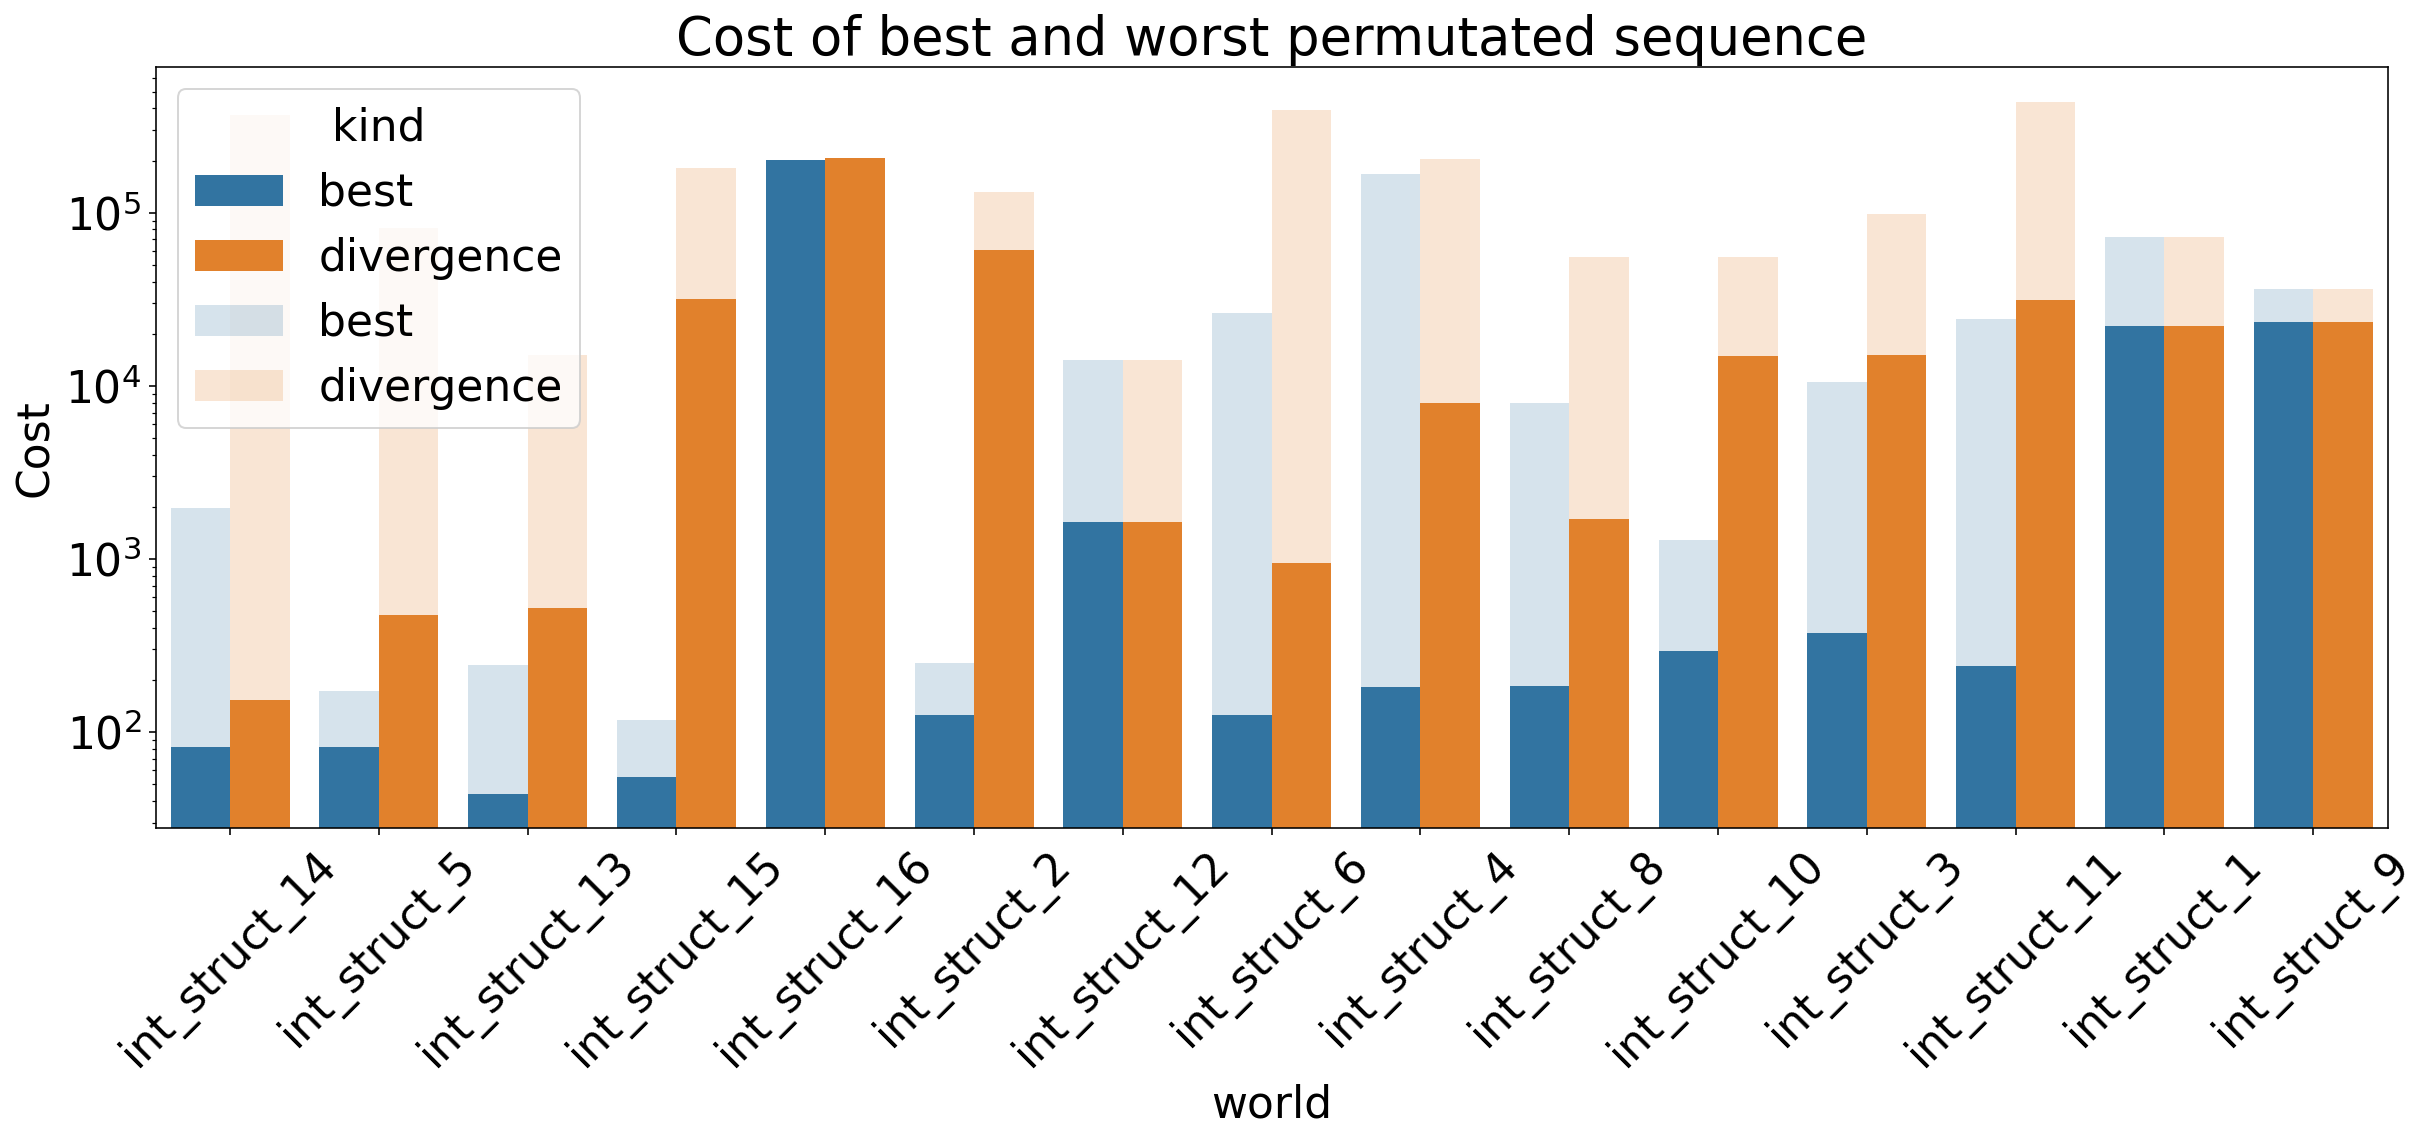

In [22]:
sns.barplot(x='world',y='best score',hue="kind",
            data=sequences_df)
sns.barplot(x='world',y='worst_score',hue="kind", alpha = 0.2,
            data=sequences_df)
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel("Cost")
plt.title("Cost of best and worst permutated sequence")
plt.show()